In [4]:
import pandas as pd
import numpy as np

import os

%matplotlib inline
import matplotlib.pyplot as plt
import altair as alt

# for API requests
import openmeteo_requests
import requests_cache
from retry_requests import retry

In [5]:
ruta_data = "../data/data_casal_montserratina/"

# Petición a la API de weatherbit 

In [6]:
lat = 41.32062    # casal de la montserratina
lon = 2.0105984   # casal de la montserratina
start_date = '2021-01-01' # YYYY-MM-DD
end_date = '2024-05-07' # YYYY-MM-DD

In [7]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": lat,
	"longitude": lon,
	"start_date": start_date,
	"end_date": end_date,
	"hourly": ["temperature_2m", "relative_humidity_2m", "dew_point_2m", "apparent_temperature", "precipitation_probability", 
            "precipitation", "pressure_msl", "surface_pressure", "cloud_cover", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high", 
            "visibility", "evapotranspiration", "et0_fao_evapotranspiration", "vapour_pressure_deficit", "wind_speed_10m", 
            "wind_speed_80m", "wind_speed_120m", "wind_speed_180m", "wind_direction_10m", "wind_direction_80m", "wind_direction_120m", 
            "wind_direction_180m", "wind_gusts_10m", "temperature_80m", "temperature_120m", "temperature_180m", "soil_temperature_0cm", 
            "soil_temperature_6cm", "soil_temperature_18cm", "soil_temperature_54cm", "soil_moisture_0_to_1cm", "soil_moisture_1_to_3cm",
              "soil_moisture_3_to_9cm", "soil_moisture_9_to_27cm", "soil_moisture_27_to_81cm", "uv_index", "uv_index_clear_sky", 
              "is_day", "cape", "freezing_level_height", "sunshine_duration", "shortwave_radiation", "direct_radiation", 
              "diffuse_radiation", "direct_normal_irradiance", "global_tilted_irradiance", "terrestrial_radiation"],
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_dew_point_2m = hourly.Variables(2).ValuesAsNumpy()
hourly_apparent_temperature = hourly.Variables(3).ValuesAsNumpy()
hourly_precipitation_probability = hourly.Variables(4).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(5).ValuesAsNumpy()
hourly_pressure_msl = hourly.Variables(6).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(7).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(8).ValuesAsNumpy()
hourly_cloud_cover_low = hourly.Variables(9).ValuesAsNumpy()
hourly_cloud_cover_mid = hourly.Variables(10).ValuesAsNumpy()
hourly_cloud_cover_high = hourly.Variables(11).ValuesAsNumpy()
hourly_visibility = hourly.Variables(12).ValuesAsNumpy()
hourly_evapotranspiration = hourly.Variables(13).ValuesAsNumpy()
hourly_et0_fao_evapotranspiration = hourly.Variables(14).ValuesAsNumpy()
hourly_vapour_pressure_deficit = hourly.Variables(15).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(16).ValuesAsNumpy()
hourly_wind_speed_80m = hourly.Variables(17).ValuesAsNumpy()
hourly_wind_speed_120m = hourly.Variables(18).ValuesAsNumpy()
hourly_wind_speed_180m = hourly.Variables(19).ValuesAsNumpy()
hourly_wind_direction_10m = hourly.Variables(20).ValuesAsNumpy()
hourly_wind_direction_80m = hourly.Variables(21).ValuesAsNumpy()
hourly_wind_direction_120m = hourly.Variables(22).ValuesAsNumpy()
hourly_wind_direction_180m = hourly.Variables(23).ValuesAsNumpy()
hourly_wind_gusts_10m = hourly.Variables(24).ValuesAsNumpy()
hourly_temperature_80m = hourly.Variables(25).ValuesAsNumpy()
hourly_temperature_120m = hourly.Variables(26).ValuesAsNumpy()
hourly_temperature_180m = hourly.Variables(27).ValuesAsNumpy()
hourly_soil_temperature_0cm = hourly.Variables(28).ValuesAsNumpy()
hourly_soil_temperature_6cm = hourly.Variables(29).ValuesAsNumpy()
hourly_soil_temperature_18cm = hourly.Variables(30).ValuesAsNumpy()
hourly_soil_temperature_54cm = hourly.Variables(31).ValuesAsNumpy()
hourly_soil_moisture_0_to_1cm = hourly.Variables(32).ValuesAsNumpy()
hourly_soil_moisture_1_to_3cm = hourly.Variables(33).ValuesAsNumpy()
hourly_soil_moisture_3_to_9cm = hourly.Variables(34).ValuesAsNumpy()
hourly_soil_moisture_9_to_27cm = hourly.Variables(35).ValuesAsNumpy()
hourly_soil_moisture_27_to_81cm = hourly.Variables(36).ValuesAsNumpy()
hourly_uv_index = hourly.Variables(37).ValuesAsNumpy()
hourly_uv_index_clear_sky = hourly.Variables(38).ValuesAsNumpy()
hourly_is_day = hourly.Variables(39).ValuesAsNumpy()
hourly_cape = hourly.Variables(40).ValuesAsNumpy()
hourly_freezing_level_height = hourly.Variables(41).ValuesAsNumpy()
hourly_sunshine_duration = hourly.Variables(42).ValuesAsNumpy()
hourly_shortwave_radiation = hourly.Variables(43).ValuesAsNumpy()
hourly_direct_radiation = hourly.Variables(44).ValuesAsNumpy()
hourly_diffuse_radiation = hourly.Variables(45).ValuesAsNumpy()
hourly_direct_normal_irradiance = hourly.Variables(46).ValuesAsNumpy()
hourly_global_tilted_irradiance = hourly.Variables(47).ValuesAsNumpy()
hourly_terrestrial_radiation = hourly.Variables(48).ValuesAsNumpy()

hourly_data = {"Date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m_C"] = hourly_temperature_2m
hourly_data["relative_humidity_2m_%"] = hourly_relative_humidity_2m
hourly_data["dew_point_2m_C"] = hourly_dew_point_2m
hourly_data["apparent_temperature_C"] = hourly_apparent_temperature
hourly_data["precipitation_probability_%"] = hourly_precipitation_probability
hourly_data["precipitation_mm"] = hourly_precipitation
hourly_data["pressure_msl_hPa"] = hourly_pressure_msl
hourly_data["surface_pressure_hPa"] = hourly_surface_pressure
hourly_data["cloud_cover_%"] = hourly_cloud_cover
hourly_data["cloud_cover_low_%"] = hourly_cloud_cover_low
hourly_data["cloud_cover_mid_%"] = hourly_cloud_cover_mid
hourly_data["cloud_cover_high_%"] = hourly_cloud_cover_high
hourly_data["visibility_"] = hourly_visibility
hourly_data["evapotranspiration"] = hourly_evapotranspiration
hourly_data["et0_fao_evapotranspiration_mm"] = hourly_et0_fao_evapotranspiration
hourly_data["vapour_pressure_deficit_kPa"] = hourly_vapour_pressure_deficit
hourly_data["wind_speed_10m_km/h"] = hourly_wind_speed_10m
hourly_data["wind_speed_80m_km/h"] = hourly_wind_speed_80m
hourly_data["wind_speed_120m_km/h"] = hourly_wind_speed_120m
hourly_data["wind_speed_180m_km/h"] = hourly_wind_speed_180m
hourly_data["wind_direction_10m_º"] = hourly_wind_direction_10m
hourly_data["wind_direction_80m_º"] = hourly_wind_direction_80m
hourly_data["wind_direction_120m_º"] = hourly_wind_direction_120m
hourly_data["wind_direction_180m_º"] = hourly_wind_direction_180m
hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m
hourly_data["temperature_80m_C"] = hourly_temperature_80m
hourly_data["temperature_120m_C"] = hourly_temperature_120m
hourly_data["temperature_180m_C"] = hourly_temperature_180m
hourly_data["soil_temperature_0cm_C"] = hourly_soil_temperature_0cm
hourly_data["soil_temperature_6cm_C"] = hourly_soil_temperature_6cm
hourly_data["soil_temperature_18cm_C"] = hourly_soil_temperature_18cm
hourly_data["soil_temperature_54cm_C"] = hourly_soil_temperature_54cm
hourly_data["soil_moisture_0_to_1cm_m3"] = hourly_soil_moisture_0_to_1cm
hourly_data["soil_moisture_1_to_3cm_m3"] = hourly_soil_moisture_1_to_3cm
hourly_data["soil_moisture_3_to_9cm_m3"] = hourly_soil_moisture_3_to_9cm
hourly_data["soil_moisture_9_to_27cm_m3"] = hourly_soil_moisture_9_to_27cm
hourly_data["soil_moisture_27_to_81cm_m3"] = hourly_soil_moisture_27_to_81cm
hourly_data["uv_index"] = hourly_uv_index
hourly_data["uv_index_clear_sky"] = hourly_uv_index_clear_sky
hourly_data["is_day"] = hourly_is_day
hourly_data["cape"] = hourly_cape
hourly_data["freezing_level_height"] = hourly_freezing_level_height
hourly_data["sunshine_duration_sec"] = hourly_sunshine_duration
hourly_data["shortwave_radiation_W/m2"] = hourly_shortwave_radiation
hourly_data["direct_radiation_W/m2"] = hourly_direct_radiation
hourly_data["diffuse_radiation_W/m2"] = hourly_diffuse_radiation
hourly_data["direct_normal_irradiance_W/m2"] = hourly_direct_normal_irradiance
hourly_data["global_tilted_irradiance_W/m2"] = hourly_global_tilted_irradiance
hourly_data["terrestrial_radiation_W/m2"] = hourly_terrestrial_radiation


hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe.shape)

Coordinates 41.3005256652832°N 2.0659971237182617°E
Elevation 49.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
(29352, 50)


In [8]:
hourly_dataframe.head(3)

,Date,temperature_2m_C,relative_humidity_2m_%,dew_point_2m_C,apparent_temperature_C,precipitation_probability_%,precipitation_mm,pressure_msl_hPa,surface_pressure_hPa,cloud_cover_%,...,is_day,cape,freezing_level_height,sunshine_duration_sec,shortwave_radiation_W/m2,direct_radiation_W/m2,diffuse_radiation_W/m2,direct_normal_irradiance_W/m2,global_tilted_irradiance_W/m2,terrestrial_radiation_W/m2
0,2021-01-01 00:00:00+00:00,8.2715,78.058311,4.6715,6.155564,NaN,0.0,1006.599976,1000.633728,31.200001,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-01 01:00:00+00:00,6.9215,78.675629,3.4715,4.431027,NaN,0.0,1006.299988,1000.306580,52.200005,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-01-01 02:00:00+00:00,4.9715,84.770615,2.6215,2.005269,NaN,0.0,1006.099976,1000.066040,33.600002,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
hourly_dataframe.tail(3)

,Date,temperature_2m_C,relative_humidity_2m_%,dew_point_2m_C,apparent_temperature_C,precipitation_probability_%,precipitation_mm,pressure_msl_hPa,surface_pressure_hPa,cloud_cover_%,...,is_day,cape,freezing_level_height,sunshine_duration_sec,shortwave_radiation_W/m2,direct_radiation_W/m2,diffuse_radiation_W/m2,direct_normal_irradiance_W/m2,global_tilted_irradiance_W/m2,terrestrial_radiation_W/m2
29349,2024-05-07 21:00:00+00:00,13.621500,87.137695,11.521500,13.145473,NaN,0.0,1019.500000,1013.569458,14.7,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29350,2024-05-07 22:00:00+00:00,13.221499,90.626877,11.721499,12.888910,NaN,0.0,1019.799988,1013.859375,34.5,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29351,2024-05-07 23:00:00+00:00,12.721499,92.103493,11.471499,12.388971,NaN,0.0,1019.900024,1013.948669,1.5,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Drop de variables que no aportan información, en base a la EDA

In [10]:
# Specify the threshold percentage (e.g., 50%)
threshold_percentage = 95

# Calculate the percentage of NaN values per column
nan_percentage = hourly_dataframe.isnull().mean() * 100

# Filter columns where the percentage of NaN values is greater than the threshold
cols_to_drop = nan_percentage[nan_percentage > threshold_percentage].index.tolist()

print(f"Columns dropped: {cols_to_drop}")

# Drop these columns from the dataframe
hourly_dataframe.drop(columns=cols_to_drop, inplace=True)

Columns dropped: ['precipitation_probability_%', 'visibility_', 'evapotranspiration', 'wind_speed_80m_km/h', 'wind_speed_120m_km/h', 'wind_speed_180m_km/h', 'wind_direction_80m_º', 'wind_direction_120m_º', 'wind_direction_180m_º', 'temperature_80m_C', 'temperature_120m_C', 'temperature_180m_C', 'soil_temperature_0cm_C', 'soil_temperature_6cm_C', 'soil_temperature_18cm_C', 'soil_temperature_54cm_C', 'soil_moisture_0_to_1cm_m3', 'soil_moisture_1_to_3cm_m3', 'soil_moisture_3_to_9cm_m3', 'soil_moisture_9_to_27cm_m3', 'soil_moisture_27_to_81cm_m3', 'uv_index', 'uv_index_clear_sky', 'cape', 'freezing_level_height']


In [11]:
# también hago drop de Precipitation, que > 90% de los valores son 0
hourly_dataframe.drop(columns=["precipitation_mm"], inplace=True)

In [12]:
# Format the date column
hourly_dataframe['Date'] = hourly_dataframe['Date'].dt.strftime("%Y-%m-%d %H:%M:%S")

# Convertir la columna "fecha" a datetime
hourly_dataframe["Date"] = pd.to_datetime(hourly_dataframe["Date"], format="%Y-%m-%d %H:%M:%S")

In [13]:
hourly_dataframe.head()

,Date,temperature_2m_C,relative_humidity_2m_%,dew_point_2m_C,apparent_temperature_C,pressure_msl_hPa,surface_pressure_hPa,cloud_cover_%,cloud_cover_low_%,cloud_cover_mid_%,...,wind_direction_10m_º,wind_gusts_10m,is_day,sunshine_duration_sec,shortwave_radiation_W/m2,direct_radiation_W/m2,diffuse_radiation_W/m2,direct_normal_irradiance_W/m2,global_tilted_irradiance_W/m2,terrestrial_radiation_W/m2
0,2021-01-01 00:00:00,8.2715,78.058311,4.6715,6.155564,1006.599976,1000.633728,31.200001,0.0,33.0,...,288.435028,12.599999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-01 01:00:00,6.9215,78.675629,3.4715,4.431027,1006.299988,1000.306580,52.200005,0.0,68.0,...,315.000092,15.480000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-01-01 02:00:00,4.9715,84.770615,2.6215,2.005269,1006.099976,1000.066040,33.600002,0.0,14.0,...,304.992096,13.679999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-01-01 03:00:00,5.4715,86.034058,3.3215,3.000477,1005.799988,999.778503,42.300003,0.0,28.0,...,246.370605,13.679999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-01-01 04:00:00,4.9715,89.706940,3.4215,2.381111,1005.599976,999.569031,47.100002,1.0,38.0,...,264.289490,11.520000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
hourly_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29352 entries, 0 to 29351
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           29352 non-null  datetime64[ns]
 1   temperature_2m_C               29352 non-null  float32       
 2   relative_humidity_2m_%         29352 non-null  float32       
 3   dew_point_2m_C                 29352 non-null  float32       
 4   apparent_temperature_C         29352 non-null  float32       
 5   pressure_msl_hPa               29352 non-null  float32       
 6   surface_pressure_hPa           29352 non-null  float32       
 7   cloud_cover_%                  29352 non-null  float32       
 8   cloud_cover_low_%              29352 non-null  float32       
 9   cloud_cover_mid_%              29352 non-null  float32       
 10  cloud_cover_high_%             29352 non-null  float32       
 11  et0_fao_evapotr

# Resample - Cambiar frecuencia horaria a cuarto-horaria

In [15]:
df_upsampled = hourly_dataframe.copy()

df_upsampled.set_index("Date", inplace=True)

# Upsample the data to 15 minutes
df_upsampled = df_upsampled.groupby(df_upsampled.index).first().resample('15T').interpolate(method='linear')

In [16]:
df_upsampled.tail(4)

,temperature_2m_C,relative_humidity_2m_%,dew_point_2m_C,apparent_temperature_C,pressure_msl_hPa,surface_pressure_hPa,cloud_cover_%,cloud_cover_low_%,cloud_cover_mid_%,cloud_cover_high_%,...,wind_direction_10m_º,wind_gusts_10m,is_day,sunshine_duration_sec,shortwave_radiation_W/m2,direct_radiation_W/m2,diffuse_radiation_W/m2,direct_normal_irradiance_W/m2,global_tilted_irradiance_W/m2,terrestrial_radiation_W/m2
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-07 22:15:00,13.096499,90.996033,11.658999,12.763926,1019.825012,1013.881714,26.25,2.5,4.75,70.5,...,100.527206,11.969999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-05-07 22:30:00,12.971499,91.365189,11.596499,12.638941,1019.849976,1013.904053,18.00,2.0,3.50,47.0,...,187.018143,11.699999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-05-07 22:45:00,12.846499,91.734337,11.533999,12.513956,1019.875000,1013.926331,9.75,1.5,2.25,23.5,...,273.509064,11.429999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-05-07 23:00:00,12.721499,92.103493,11.471499,12.388971,1019.900024,1013.948669,1.50,1.0,1.00,0.0,...,360.000000,11.159999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Estimación de la producción solar de un sistema fotovoltaico

Primero se calcula el parametro TM(t) que corresponde a la temperatura interior de los Modulos/placas a tiempo t.

La temperatura interior del m'odulo viene dada por  >>>> TM[i] = 17.23292 + 0.451708 * t_out[i] + 0.022706 * irr[i]

Donde:     
- t_out <-> temp ambiente (temp) [°C]
 
-  irr   <-> Irradiancia directa normal (dni) [kW/m2] 

In [17]:
df_upsampled["Temp_interna_Modulo_C"] = 17.23292 + 0.451708 * df_upsampled["temperature_2m_C"] + 0.022706 * df_upsampled["direct_normal_irradiance_W/m2"]

In [18]:
df_upsampled.head()

,temperature_2m_C,relative_humidity_2m_%,dew_point_2m_C,apparent_temperature_C,pressure_msl_hPa,surface_pressure_hPa,cloud_cover_%,cloud_cover_low_%,cloud_cover_mid_%,cloud_cover_high_%,...,wind_gusts_10m,is_day,sunshine_duration_sec,shortwave_radiation_W/m2,direct_radiation_W/m2,diffuse_radiation_W/m2,direct_normal_irradiance_W/m2,global_tilted_irradiance_W/m2,terrestrial_radiation_W/m2,Temp_interna_Modulo_C
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,8.271500,78.058311,4.6715,6.155564,1006.599976,1000.633728,31.200001,0.0,33.00,38.0,...,12.599999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.969223
2021-01-01 00:15:00,7.934000,78.212639,4.3715,5.724430,1006.524963,1000.551941,36.450001,0.0,41.75,38.0,...,13.320000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.816771
2021-01-01 00:30:00,7.596499,78.366974,4.0715,5.293296,1006.449951,1000.470154,41.700005,0.0,50.50,38.0,...,14.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.664320
2021-01-01 00:45:00,7.259000,78.521301,3.7715,4.862162,1006.375000,1000.388367,46.950005,0.0,59.25,38.0,...,14.760000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.511868
2021-01-01 01:00:00,6.921500,78.675629,3.4715,4.431027,1006.299988,1000.306580,52.200005,0.0,68.00,38.0,...,15.480000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.359417


luego se introduce la formula de generacion electrica de una placa solar

PV[i] = max(0, (((-0.062059 * irr[i] + 0.04277774) * TM[i] + 9.692792 * irr[i] - 1.885868)) * (PPv / 6.6))

donde:
- PV[i]     es la generacion electrica de una placa solar en las condiciones dadas. supongo que las unidades son [Kw]
- PPv       es la Potencia instalada / potencia máxima de generación [kW]
- irr[i]    es la Irradiancia directa normal [kW/m2] 
- TM[i]     es la temperatura interna del modulo/placa solar
 

In [19]:
PPvn = 15000 # 5Kw = 5000 watts de paneles
irr = df_upsampled["direct_normal_irradiance_W/m2"]
TM = df_upsampled["Temp_interna_Modulo_C"]

# Calculo de la producción de energía solar en kW (por eso divido por 1000000)
df_upsampled["PV_kW"] = ((np.maximum(0, ((-0.062059 * irr + 0.04277774)* TM) + 9.692792 * irr - 1.885868 )* PPvn) / 6.6) / 1000000

In [20]:
df_upsampled.sample(5)

,temperature_2m_C,relative_humidity_2m_%,dew_point_2m_C,apparent_temperature_C,pressure_msl_hPa,surface_pressure_hPa,cloud_cover_%,cloud_cover_low_%,cloud_cover_mid_%,cloud_cover_high_%,...,is_day,sunshine_duration_sec,shortwave_radiation_W/m2,direct_radiation_W/m2,diffuse_radiation_W/m2,direct_normal_irradiance_W/m2,global_tilted_irradiance_W/m2,terrestrial_radiation_W/m2,Temp_interna_Modulo_C,PV_kW
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-05 20:00:00,9.571500,90.674248,8.121500,8.162127,1021.299988,1015.274231,27.6,7.0,8.0,55.0,...,0.0,0.0,0.00,0.00,0.0,0.000000,0.00,0.000000,21.556442,0.000000
2022-04-08 10:00:00,17.971500,60.519566,10.221499,15.953159,1013.299988,1007.493286,29.1,0.0,0.0,97.0,...,1.0,3600.0,681.00,560.00,121.0,816.791870,681.00,936.037109,43.896866,12.936102
2023-06-11 13:30:00,26.271500,57.575539,17.171501,28.144419,1013.650024,1008.001709,34.5,0.0,15.5,84.0,...,1.0,3600.0,698.00,401.00,297.0,441.935272,698.00,1209.513428,39.134548,7.295609
2023-09-05 13:15:00,26.996502,66.163567,20.134001,29.996477,1017.000000,1011.346680,0.0,0.0,0.0,0.0,...,1.0,3600.0,765.25,646.25,119.0,811.335632,765.25,1071.470947,47.849644,12.397743
2022-10-06 15:30:00,21.196501,77.617676,17.121502,20.520317,1026.449951,1020.632324,36.0,3.0,5.5,100.0,...,1.0,3600.0,277.00,124.00,153.0,282.112823,277.00,566.774170,33.213203,4.892070


In [21]:
# # Calcular la suma de la producción solar por día y asignar a una nueva columna
# df_upsampled['suma_produccion_diaria'] = df_upsampled.groupby(df_upsampled.index)['PV'].transform('cumsum')

## outliers

In [22]:
df_PV =df_upsampled.copy()

In [23]:
df_PV.describe()

,temperature_2m_C,relative_humidity_2m_%,dew_point_2m_C,apparent_temperature_C,pressure_msl_hPa,surface_pressure_hPa,cloud_cover_%,cloud_cover_low_%,cloud_cover_mid_%,cloud_cover_high_%,...,is_day,sunshine_duration_sec,shortwave_radiation_W/m2,direct_radiation_W/m2,diffuse_radiation_W/m2,direct_normal_irradiance_W/m2,global_tilted_irradiance_W/m2,terrestrial_radiation_W/m2,Temp_interna_Modulo_C,PV_kW
count,117405.000000,117405.000000,117405.000000,117405.000000,117405.000000,117405.000000,117405.000000,117405.000000,117405.000000,117405.000000,...,117405.000000,117405.000000,117405.000000,117405.000000,117405.000000,117405.000000,117405.000000,117405.000000,117405.000000,117405.000000
mean,16.345911,75.815544,11.770893,15.876802,1017.264526,1011.399536,31.648211,14.350688,16.178673,37.552395,...,0.504817,1455.926636,187.481766,129.714310,57.767456,231.971344,187.481766,322.066803,29.883642,3.804542
std,6.295919,14.106503,6.423386,8.388784,7.090597,7.019595,31.260885,26.726194,28.405193,41.038044,...,0.486783,1679.571777,257.259277,199.680511,75.146194,296.850281,257.259277,400.144684,8.250351,4.770127
min,0.871500,20.524551,-9.728500,-4.200798,984.200012,978.443848,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.626583,0.000000
25%,11.533999,66.661652,7.096500,9.322824,1013.500000,1007.704712,3.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.013201,0.000000
50%,15.721499,77.717209,11.321500,14.548092,1017.174988,1011.350098,24.450003,0.250000,1.000000,16.000000,...,0.500000,0.000000,15.000000,2.250000,10.000000,17.312403,15.000001,58.854763,27.078573,0.318937
75%,21.596500,87.228455,17.471500,23.239592,1021.174988,1015.247620,49.050003,15.000000,17.500000,85.000000,...,1.000000,3600.000000,351.000000,220.000000,107.000000,500.377747,351.000000,629.624268,36.989017,8.390152
max,34.621498,100.000000,25.671501,38.788956,1039.000000,1032.904175,100.000000,100.000000,100.000000,100.000000,...,1.000000,3600.000000,938.000000,802.000000,435.000000,926.643433,938.000000,1254.013062,51.321198,14.624463


In [24]:
def getNumberOfOutliersPerColumn(df, columns_list):
    outliers_count = {}  # Diccionario para almacenar el número de outliers por columna

    for col in columns_list:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        # Calcular los límites inferiores y superiores para identificar outliers
        lim_inf = q1 - 2 * iqr
        lim_sup = q3 + 2 * iqr

        outliers = ((df[col] < lim_inf) | (df[col] > lim_sup))
        outliers_count[col] = outliers.sum()  # Almacenar el número de outliers por columna

    # Ordenar el diccionario por el número de outliers en orden decreciente
    sorted_outliers_count = dict(sorted(outliers_count.items(), key=lambda x: x[1], reverse=True))

    # Iterar sobre el diccionario ordenado y mostrar la información
    for col, count in sorted_outliers_count.items():
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lim_inf = q1 - 2 * iqr
        lim_sup = q3 + 2 * iqr
        print(f"For {col} column, the Number of Outliers is {count}. \t\t >>> Sus límites son {lim_inf} y {lim_sup}.\n")


In [25]:
getNumberOfOutliersPerColumn(df_PV, df_PV.columns.values)

For cloud_cover_mid_% column, the Number of Outliers is 14522. 		 >>> Sus límites son -35.0 y 52.5.

For cloud_cover_low_% column, the Number of Outliers is 14341. 		 >>> Sus límites son -30.0 y 45.0.

For direct_radiation_W/m2 column, the Number of Outliers is 3268. 		 >>> Sus límites son -440.0 y 660.0.

For vapour_pressure_deficit_kPa column, the Number of Outliers is 1868. 		 >>> Sus límites son -0.777058333158493 y 1.6676245331764221.

For wind_speed_10m_km/h column, the Number of Outliers is 1745. 		 >>> Sus límites son -8.840869426727295 y 28.223265647888184.

For surface_pressure_hPa column, the Number of Outliers is 1738. 		 >>> Sus límites son 992.618896484375 y 1030.3334350585938.

For pressure_msl_hPa column, the Number of Outliers is 1640. 		 >>> Sus límites son 998.1500244140625 y 1036.5249633789062.

For et0_fao_evapotranspiration_mm column, the Number of Outliers is 841. 		 >>> Sus límites son -0.39713244256563485 y 0.6008791881613433.

For wind_gusts_10m column, the Nu

### Winsorization

Winsorizing or winsorization is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers. 

It´s a typical strategy is to set all outliers to a specified percentile of the data; for example, a 90% winsorization would see all data below the 5th percentile set to the 5th percentile, and data above the 95th percentile set to the 95th percentile.

Para resolver de una forma sencilla los outliers, usaré Winsorización. 

In [26]:
df_winsorized = df_PV.copy()

In [27]:
def winsorizeData(df, columns, upper_bound, lower_bound):
    for col in columns:
        min_value = df[col].quantile(lower_bound)
        max_value = df[col].quantile(upper_bound)
        df[col] = df[col].clip(lower=min_value, upper=max_value)

In [28]:
#winsorizeData(df_winsorized, df_winsorized.columns, 0.98, 0.03)
columnswOutliers = ["cloud_cover_mid_%", "cloud_cover_low_%", "direct_radiation_W/m2", "vapour_pressure_deficit_kPa", "wind_speed_10m_km/h","surface_pressure_hPa",
    "pressure_msl_hPa", "et0_fao_evapotranspiration_mm", "wind_gusts_10m", "diffuse_radiation_W/m2", "relative_humidity_2m_%"]
winsorizeData(df_winsorized, columnswOutliers, 0.98, 0.03)

getNumberOfOutliersPerColumn(df_winsorized, df_winsorized.columns)

For cloud_cover_mid_% column, the Number of Outliers is 14522. 		 >>> Sus límites son -35.0 y 52.5.

For cloud_cover_low_% column, the Number of Outliers is 14341. 		 >>> Sus límites son -30.0 y 45.0.

For direct_radiation_W/m2 column, the Number of Outliers is 3268. 		 >>> Sus límites son -440.0 y 660.0.

For temperature_2m_C column, the Number of Outliers is 0. 		 >>> Sus límites son -8.591002464294434 y 41.72150230407715.

For relative_humidity_2m_% column, the Number of Outliers is 0. 		 >>> Sus límites son 25.528045654296875 y 128.362060546875.

For dew_point_2m_C column, the Number of Outliers is 0. 		 >>> Sus límites son -13.653501033782959 y 38.22150135040283.

For apparent_temperature_C column, the Number of Outliers is 0. 		 >>> Sus límites son -18.510709762573242 y 51.0731258392334.

For pressure_msl_hPa column, the Number of Outliers is 0. 		 >>> Sus límites son 998.1500244140625 y 1036.5249633789062.

For surface_pressure_hPa column, the Number of Outliers is 0. 		 >>> Sus

Después de la winsorización quedan las columnas: cloud_cover_mid_%, cloud_cover_low_%, que contienen muchos outliers. Se eliminan:

In [29]:
df_winsorized.drop(columns=['cloud_cover_mid_%', 'cloud_cover_low_%'], inplace=True)

In [30]:
# aplico los cambios al dataframe original
df_PV = df_winsorized.copy()    

## Exogenous variables

In [31]:
df_PV.reset_index(inplace=True)

In [32]:
df_PV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117405 entries, 0 to 117404
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Date                           117405 non-null  datetime64[ns]
 1   temperature_2m_C               117405 non-null  float32       
 2   relative_humidity_2m_%         117405 non-null  float64       
 3   dew_point_2m_C                 117405 non-null  float32       
 4   apparent_temperature_C         117405 non-null  float32       
 5   pressure_msl_hPa               117405 non-null  float64       
 6   surface_pressure_hPa           117405 non-null  float64       
 7   cloud_cover_%                  117405 non-null  float32       
 8   cloud_cover_high_%             117405 non-null  float32       
 9   et0_fao_evapotranspiration_mm  117405 non-null  float64       
 10  vapour_pressure_deficit_kPa    117405 non-null  float64       
 11  

In [33]:
df_PV["Year"] = df_PV["Date"].dt.year
df_PV["Month"] = df_PV["Date"].dt.month
df_PV["Hour"] = df_PV["Date"].dt.hour
df_PV["DayOfWeek"] = df_PV["Date"].dt.day_of_week
df_PV["DayOfYear"] = df_PV["Date"].dt.day_of_year
df_PV["Day"] = df_PV["Date"].dt.day

In [34]:
df_PV.head(2)

,Date,temperature_2m_C,relative_humidity_2m_%,dew_point_2m_C,apparent_temperature_C,pressure_msl_hPa,surface_pressure_hPa,cloud_cover_%,cloud_cover_high_%,et0_fao_evapotranspiration_mm,...,global_tilted_irradiance_W/m2,terrestrial_radiation_W/m2,Temp_interna_Modulo_C,PV_kW,Year,Month,Hour,DayOfWeek,DayOfYear,Day
0,2021-01-01 00:00:00,8.2715,78.058311,4.6715,6.155564,1006.599976,1000.633728,31.200001,38.0,0.000000,...,0.0,0.0,20.969223,0.0,2021,1,0,4,1,1
1,2021-01-01 00:15:00,7.9340,78.212639,4.3715,5.724430,1006.524963,1000.551941,36.450001,38.0,0.000384,...,0.0,0.0,20.816771,0.0,2021,1,0,4,1,1


## Some Plots

### 1.Temperature

Text(0.5, 0.98, '')

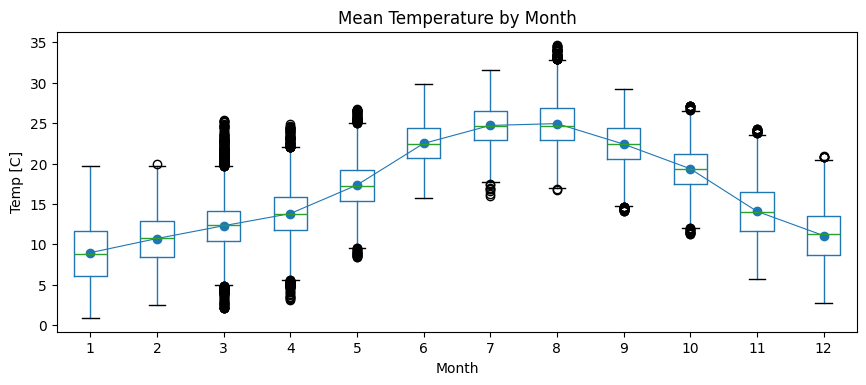

In [35]:
fig, ax = plt.subplots(figsize=(10, 4))
df_PV.boxplot(column='temperature_2m_C', by='Month', ax=ax)
df_PV.groupby('Month')['temperature_2m_C'].mean().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('Temp [C]')
ax.set_title("Mean Temperature by Month")
fig.suptitle('')

### 2.Photovoltaic Production

Text(0.5, 0.98, '')

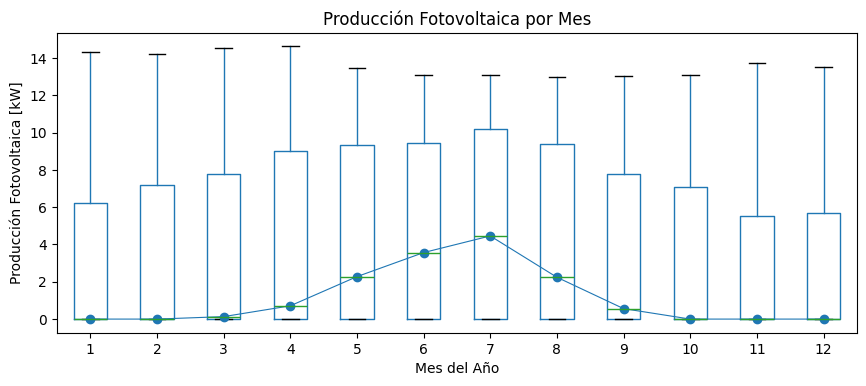

In [36]:
fig, ax = plt.subplots(figsize=(10, 4))
df_PV.boxplot(column='PV_kW', by='Month', ax=ax)
df_PV.groupby('Month')['PV_kW'].median().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('Producción Fotovoltaica [kW]')
ax.set_xlabel('Mes del Año')
ax.set_title("Producción Fotovoltaica por Mes")
fig.suptitle('')


In [37]:
# We will create a pivot table to facilitate the heatmap creation
df_heatmap = df_PV.pivot_table(values='PV_kW', index='Month', aggfunc='median').reset_index()

# Create the heatmap using Altair
heatmap = alt.Chart(df_heatmap).mark_rect().encode(
    x=alt.X('Month:O', title='Month'),
    y=alt.Y('PV_kW:Q', title='PV production [kW]'),
    color=alt.Color('PV_kW:Q', title='[kW]').bin(maxbins=10).scale(scheme='oranges')
).properties(
    width=400,
    height=300,
    title='Monthly Average PV production '
)

heatmap.show()  

alt.Chart(...)

Text(0.5, 0.98, '')

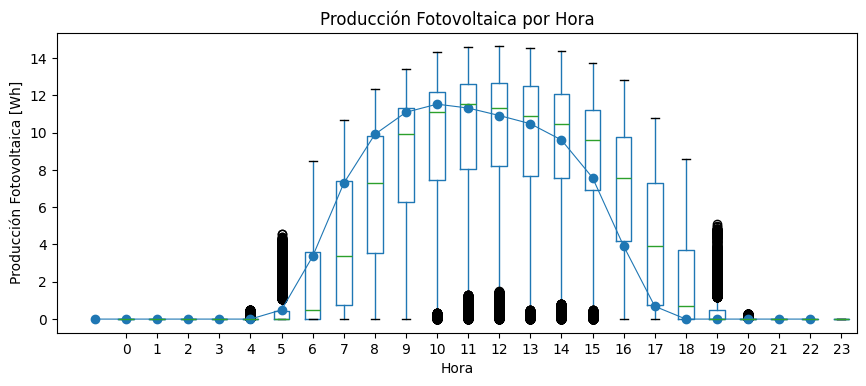

In [38]:
fig, ax = plt.subplots(figsize=(10, 4))
df_PV.boxplot(column='PV_kW', by='Hour', ax=ax)
df_PV.groupby('Hour')['PV_kW'].median().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('Producción Fotovoltaica [Wh]')
ax.set_xlabel('Hora')
ax.set_title("Producción Fotovoltaica por Hora")
fig.suptitle('')

In [39]:

# We will create a pivot table to facilitate the heatmap creation
df_heatmap = df_PV.pivot_table(values='PV_kW', index='Hour', aggfunc='mean').reset_index()

# Create the heatmap using Altair
heatmap = alt.Chart(df_heatmap).mark_rect().encode(
    x=alt.X('Hour:O', title='Hour'),
    y=alt.Y('PV_kW:Q', title='PV production [kW]'),
    color=alt.Color('PV_kW:Q', title='PV [kW]').bin(maxbins=10).scale(scheme='oranges')
).properties(
    width=400,
    height=300,
    title='PV Production by Hour'
)

heatmap.show()  


alt.Chart(...)

In [40]:
# df_hist = df_PV.pivot_table(values='PV_kW', index='Hour', aggfunc='mean').reset_index()

# alt.Chart(df_hist).mark_bar().encode(
#     alt.X("Hour:O").bin(maxbins=20).scale(domain=[1, 10]),
#     alt.Y('count()'),
#     alt.Color("IMDB_Rating:Q").bin(maxbins=20).scale(scheme='pinkyellowgreen')


# df_hist = df_PV.pivot_table(values='PV_kW', index='Hour', aggfunc='mean').reset_index()

# # Create the heatmap using Altair
# heatmap = alt.Chart(df_heatmap).mark_rect().encode(
#     x=alt.X('Hour:O', title='Hour'),
#     y=alt.Y('PV_kW:Q', title='PV production [kW]'),
#     color=alt.Color('PV_kW:Q', title='Average PV production [kW]')
# ).properties(
#     width=800,
#     height=300,
#     title='PV Production by Hour'
# )

# heatmap.show()  

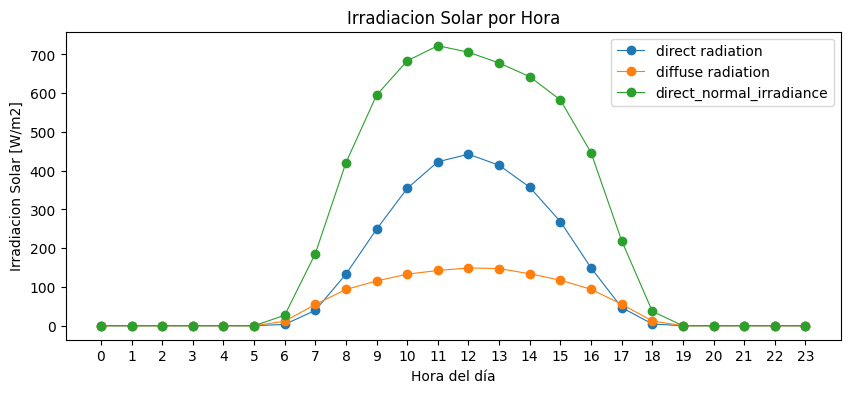

In [41]:
fig, ax = plt.subplots(figsize=(10, 4))


df_PV.groupby('Hour')['direct_radiation_W/m2'].median().plot(style='o-', linewidth=.8, ax=ax)

df_PV.groupby('Hour')['diffuse_radiation_W/m2'].median().plot(style='o-', linewidth=.8, ax=ax)

df_PV.groupby('Hour')['direct_normal_irradiance_W/m2'].median().plot(style='o-', linewidth=.8, ax=ax)

ax.legend(['direct radiation', 'diffuse radiation', 'direct_normal_irradiance'])

# hourly_data["shortwave_radiation_W/m2"] = hourly_shortwave_radiation
# hourly_data["global_tilted_irradiance_W/m2"] = hourly_global_tilted_irradiance
# hourly_data["terrestrial_radiation_W/m2"] = hourly_terrestrial_radiation

ax.set_ylabel('Irradiacion Solar [W/m2]')
ax.set_xlabel('Hora del día')
ax.set_title("Irradiacion Solar por Hora")
ax.set_xticks(np.arange(24))
ax = ax.set_xticklabels([str(i) for i in range(24)])

In [42]:


# import altair as alt
# from vega_datasets import data

# source = df_PV

# alt.Chart(source).mark_rect().encode(
#     x='direct_radiation_W/m2:Q',
#     y='Hour:Q'
# )

In [43]:
# dropear las variables temporales, solo se usan para graficos. 
df_save = df_PV.drop(columns=['Year', 'Month', 'Hour', 'DayOfWeek', 'DayOfYear', 'Day'])

In [44]:
# Guardar el DataFrame como CSV
nombre_archivo = "LaMonserratina_weather_&_PV.csv"
ruta_completa = os.path.join(ruta_data, nombre_archivo)

df_save.to_csv(ruta_completa, index=False)

In [45]:
nombre_archivo = "LaMonserratina_weather_&_PV.csv"

df = pd.read_csv(os.path.join(ruta_data, nombre_archivo))

df.head()

,Date,temperature_2m_C,relative_humidity_2m_%,dew_point_2m_C,apparent_temperature_C,pressure_msl_hPa,surface_pressure_hPa,cloud_cover_%,cloud_cover_high_%,et0_fao_evapotranspiration_mm,...,is_day,sunshine_duration_sec,shortwave_radiation_W/m2,direct_radiation_W/m2,diffuse_radiation_W/m2,direct_normal_irradiance_W/m2,global_tilted_irradiance_W/m2,terrestrial_radiation_W/m2,Temp_interna_Modulo_C,PV_kW
0,2021-01-01 00:00:00,8.271500,78.058311,4.6715,6.155564,1006.599976,1000.633728,31.200000,38.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.969223,0.0
1,2021-01-01 00:15:00,7.933999,78.212639,4.3715,5.724430,1006.524963,1000.551941,36.450000,38.0,0.000384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.816770,0.0
2,2021-01-01 00:30:00,7.596499,78.366974,4.0715,5.293296,1006.449951,1000.470154,41.700005,38.0,0.000769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.664320,0.0
3,2021-01-01 00:45:00,7.259000,78.521301,3.7715,4.862162,1006.375000,1000.388367,46.950005,38.0,0.001153,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.511868,0.0
4,2021-01-01 01:00:00,6.921500,78.675629,3.4715,4.431027,1006.299988,1000.306580,52.200005,38.0,0.001537,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.359417,0.0
